In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [31]:
X_train.shape

(50000, 32, 32, 3)

In [32]:
y_train.shape

(50000, 1)

[1]


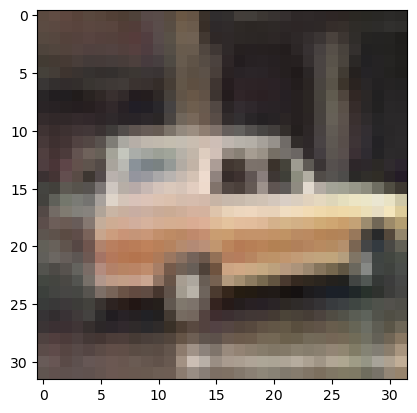

In [33]:
i = 1006
plt.imshow(X_train[i])
print(y_train[i])

In [34]:
# L_grid = 15
# W_grid = 15

# fig, axes = plt.subplots(L_grid,W_grid, figsize = (25,25))
# axes = axes.ravel()

# n_training = len(X_train)

# for i in np.arange(0,225):
#     index = np.random.randint(0,n_training)
#     axes[i].imshow(X_train[index])
#     axes[i].set_title(y_train[index])
#     axes[i].axis('off')

# plt.subplots_adjust(hspace = 0.4)

In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [36]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [37]:
import keras
y_train = keras.utils.to_categorical(y_train,10)

In [38]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [40]:
y_test = keras.utils.to_categorical(y_test,10)
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [41]:
#normalize
X_train = X_train/255
X_test = X_test/255
X_train[:5]

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import adam
from keras.callbacks import TensorBoard

In [43]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [44]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [45]:
history = cnn_model.fit(X_train,y_train,batch_size = 32, epochs = 22, shuffle = True)

Epoch 1/22
   8/1563 [..............................] - ETA: 11s - loss: 2.3194 - accuracy: 0.0820  

2023-08-07 07:35:25.991709: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 10s 6ms/step - loss: 1.5486 - accuracy: 0.4406
Epoch 2/22
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1552 - accuracy: 0.5947
Epoch 3/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0314 - accuracy: 0.6462
Epoch 4/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9960 - accuracy: 0.6626
Epoch 5/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9754 - accuracy: 0.6699
Epoch 6/22
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9543 - accuracy: 0.6792
Epoch 7/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9461 - accuracy: 0.6855
Epoch 8/22
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9293 - accuracy: 0.6887
Epoch 9/22
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9278 - accuracy: 0.6893
Epoch 10/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9248 - accura

In [46]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9321 - accuracy: 0.6849


[0.9320842623710632, 0.6848999857902527]

In [47]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.1761108e-02, 3.8994670e-02, 1.0759972e-02, 3.4805387e-01,
        4.5758281e-03, 6.6206843e-02, 8.4052436e-02, 8.9193443e-03,
        3.6042735e-01, 3.6248509e-02],
       [2.0670930e-03, 5.0898498e-01, 3.4491716e-08, 9.4013881e-09,
        1.1696640e-09, 6.0529476e-10, 1.7608525e-07, 2.4475344e-10,
        4.8851234e-01, 4.3537549e-04],
       [1.6929785e-02, 7.3466486e-01, 2.3221335e-04, 7.8342753e-05,
        1.2988222e-05, 9.2640466e-06, 6.7976397e-04, 1.0352270e-05,
        2.4476370e-01, 2.6187664e-03],
       [1.5326200e-01, 1.7847061e-01, 2.1977521e-05, 4.2384577e-06,
        3.6088011e-06, 2.2784475e-07, 2.4540070e-04, 2.9131786e-07,
        6.6545033e-01, 2.5413705e-03],
       [2.2241034e-05, 4.6154159e-07, 2.4552392e-03, 4.4837574e-04,
        3.3109130e-03, 1.1372399e-05, 9.9374253e-01, 5.6801349e-07,
        6.5456338e-06, 1.7812224e-06]], dtype=float32)

In [48]:
predicted_classes = np.argmax(predicted_classes, axis = 1)
predicted_classes[:5]

array([8, 1, 1, 8, 6])

In [49]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [50]:
y_test = y_test.argmax(1)
y_test[0:5]

array([3, 8, 8, 0, 6])

<Axes: >

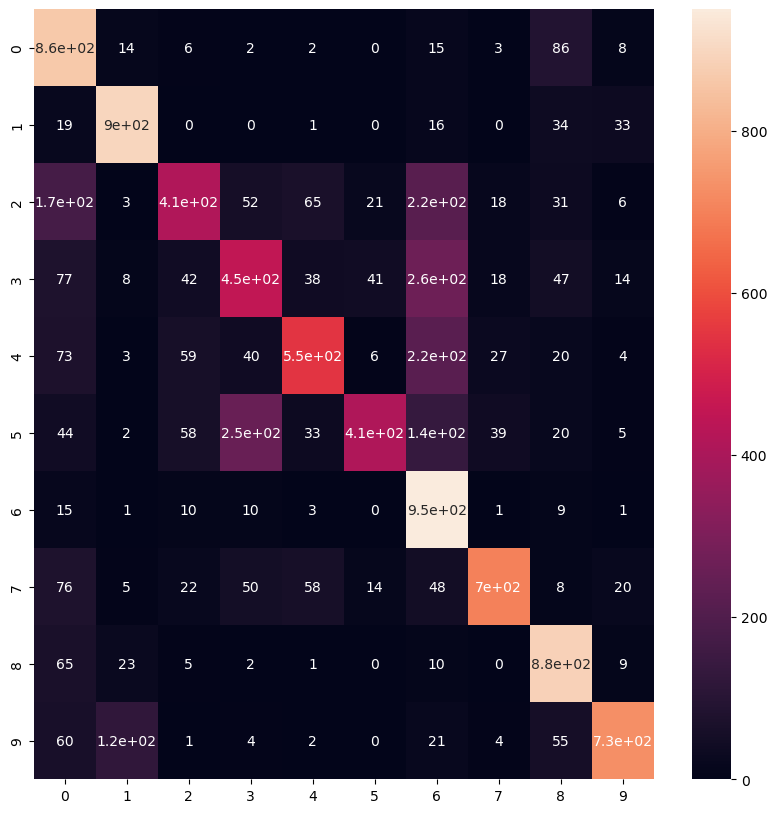

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predicted_classes)

plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

In [52]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)
#dataget_train.fit(x_train_sample)

In [53]:
datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
)

In [56]:
datagen.fit(X_train)
cnn_model.fit_generator(datagen.flow(X_train,y_train, batch_size = 32), epochs = 10)

Epoch 1/10


/tmp/ipykernel_28/2666687947.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train,y_train, batch_size = 32), epochs = 10)


   4/1563 [..............................] - ETA: 31s - loss: 2.1096 - accuracy: 0.4141  

2023-08-07 07:41:08.846896: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 33s 21ms/step - loss: 1.7595 - accuracy: 0.3736
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6754 - accuracy: 0.4047
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6496 - accuracy: 0.4210
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6123 - accuracy: 0.4249
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6175 - accuracy: 0.4284
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5929 - accuracy: 0.4358
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5955 - accuracy: 0.4362
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5692 - accuracy: 0.4448
Epoch 9/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5518 - accuracy: 0.4482
Epoch 10/10
1563/1563 [==============================] - 32s 21ms/step - lo